In [1]:
from run_gom_mp import *
import pandas as pd
import xarray as xr

from parcels import plotTrajectoriesFile



# RUN SIMULATION
%run -i gom_mp_kernels.py
%run -i run_gom_mp.py

#indices = {'lon': range(ti_lonmin, ti_lonmax), 'lat': range(ti_latmin, ti_latmax)} # for testing
#_, _ = run_gom_mp('testing_output/test.zarr', disp = True, stokes = True, diff = 0.1, indices = {}, testing = 2)
# _, pset = run_gom_mp_repeat_test('testing_output/test_repeat.zarr', disp = True, stokes = True, diff = 0.1, indices = {}, testing = 2)

In [3]:
plotTrajectoriesFile('testing_output/test_repeat.zarr', mode='movie2d_notebook')

In [3]:
test = xr.open_zarr('testing_output/test_repeat.zarr')
gom_masks = xr.open_dataset('data/gom_masks_w_inputs.nc')

c:\Users\pojun\anaconda3\envs\py3_parcels\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _version: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


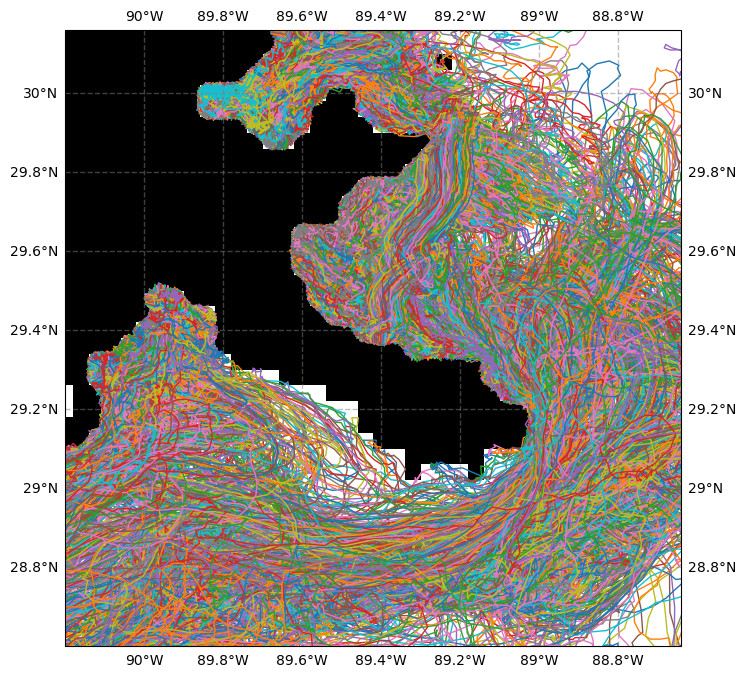

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

X_land,Y_land = np.meshgrid(gom_masks.landmask['Latitude'],gom_masks.landmask['Longitude'],  indexing='ij')

fig = plt.figure(figsize=(32,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
#ax.coastlines(resolution='50m')
ax.pcolormesh(Y_land, X_land, gom_masks.landmask,cmap='Greys')

ax.set_extent([ -90.2, -88.64, 28.6, 30.16], ccrs.PlateCarree())

_ = ax.plot(test['lon'].T, test['lat'].T, linewidth=1, zorder=1)

In [2]:
test_dd  = test.to_dask_dataframe().compute()

c:\Users\pojun\anaconda3\envs\py3_parcels\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _version: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [11]:
test_dd

,trajectory,obs,age,coast,d2s,dU,dV,lat,lon,time,z
0,0,0,0.0,3618.0,1000.000000,0.0,0.0,29.422621,-89.431496,2019-01-01 12:00:00,0.0
1,0,1,10800.0,3617.0,0.982453,0.0,0.0,29.420122,-89.427307,2019-01-01 15:00:00,0.0
2,0,2,21600.0,3617.0,1.202423,0.0,0.0,29.420439,-89.440529,2019-01-01 18:00:00,0.0
3,0,3,32400.0,3617.0,0.931552,0.0,0.0,29.414736,-89.451271,2019-01-01 21:00:00,0.0
4,0,4,43200.0,3635.0,0.777994,0.0,0.0,29.420231,-89.464516,2019-01-02 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4808575,7489,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4808576,7489,638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4808577,7489,639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4808578,7489,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [3]:
test_dd_clean = test_dd[~np.isnan(test_dd[['lat', 'lon']])]

In [4]:
import cmocean
import cartopy
import os
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir']= os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

from matplotlib import pyplot as plt, colors
plt.ion()  # To trigger the interactive inline mode

# from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
# %matplotlib ipympl 

def create_fig_axis(projection = 'PlateCarree', central_longitude=0):
    projection = cartopy.crs.PlateCarree(central_longitude) if projection == 'PlateCarree' else projection
    fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
    # Plot lat/lon grid 
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=0.1, color='k', alpha=1, 
                    linestyle='--')
    gl.top_labels, gl.right_labels = (False, False)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Add map features with Cartopy 
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                                edgecolor='face', 
                                                facecolor='none'))
    ax.coastlines(linewidth=1, zorder=10)
    
    return fig, ax

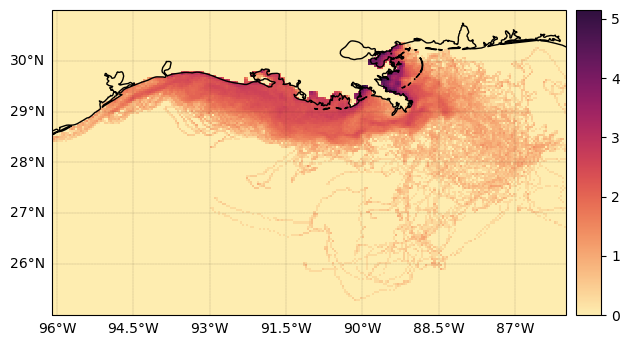

In [5]:
res_scale= 1/25
lon_bins = np.arange(MIN_LON, MAX_LON, res_scale)
lat_bins = np.arange(MIN_LAT, MAX_LAT, res_scale)

color = cmocean.cm.matter 

fig, ax = create_fig_axis()

ax.set_extent([-96.1, -86.0, 25, 31], ccrs.PlateCarree())

H, xedges, yedges = np.histogram2d(test_dd_clean['lon'], test_dd_clean['lat'], bins=(lon_bins, lat_bins))
mesh_2= ax.pcolormesh(xedges, yedges, np.log10(H.T + 1), cmap=color, vmin=0.0, rasterized=True)
#_, _, _, cs = ax.hist2d(lon[~np.isnan(lon)], lat[~np.isnan(lat)], bins=(lon_bins,lat_bins), cmap = color, vmin=0.0, rasterized=True)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

fig.add_axes(ax_cb)
plt.colorbar(mesh_2, cax=ax_cb)


plt.tight_layout()
plt.show()


In [9]:
# plot the histogram weighted by kg/hr
test_dd_weighted = test_dd.groupby('trajectory').apply(compute_weighted_trajectory)

In [10]:
test_dd_weighted['lat']

lat        lon   coast  coast_blocks    weight
trajectory                                                          
0          0    29.422621 -89.431496  3618.0             1  0.383221
           1    29.420122 -89.427307  3617.0             2  0.399075
           2    29.420439 -89.440529  3617.0             2  0.399075
           3    29.414736 -89.451271  3617.0             2  0.399075
           4    29.420231 -89.464516  3635.0             3  0.389612
...                   ...        ...     ...           ...       ...
7489       637        NaN        NaN     NaN           638  0.987660
           638        NaN        NaN     NaN           639  0.988302
           639        NaN        NaN     NaN           640  0.988941
           640        NaN        NaN     NaN           641  0.989574
           641        NaN        NaN     NaN           642  0.990197

[4808580 rows x 5 columns]

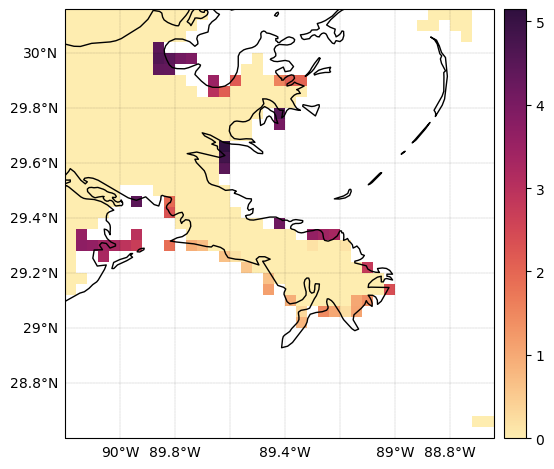

In [20]:
res_scale= 1/25
lon_bins = np.arange(MIN_LON, MAX_LON, res_scale)
lat_bins = np.arange(MIN_LAT, MAX_LAT, res_scale)

color = cmocean.cm.matter 

fig, ax = create_fig_axis()

#ax.set_extent([-96.1, -86.0, 25, 31], ccrs.PlateCarree())
lon_min, lon_max, lat_min, lat_max = -90.2, -88.64, 28.6, 30.16
ax.set_extent([lon_min,lon_max, lat_min, lat_max], ccrs.PlateCarree())



H, xedges, yedges = np.histogram2d(test_dd_clean['lon'], test_dd_clean['lat'], bins=(lon_bins, lat_bins), weights = test_dd_weighted['weight'] )
mesh_2= ax.pcolormesh(xedges, yedges, np.log10(H.T + 1), cmap=color, vmin=0.0, rasterized=True)
#_, _, _, cs = ax.hist2d(lon[~np.isnan(lon)], lat[~np.isnan(lat)], bins=(lon_bins,lat_bins), cmap = color, vmin=0.0, rasterized=True)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

fig.add_axes(ax_cb)
plt.colorbar(mesh_2, cax=ax_cb)


plt.tight_layout()
plt.show()


In [24]:
coastal_weight = test_dd.groupby('trajectory').apply(compute_weight_by_region).groupby('coast').sum()

In [53]:
gom_masks = xr.open_dataset('data/gom_masks_w_inputs.nc')
test_idxs = np.where(gom_masks.coastal_id_mask.isin(coastal_weight.index.values))

lats = gom_masks.Latitude.values[test_idxs[0]]
lons = gom_masks.Longitude.values[test_idxs[1]]
weights = coastal_weight.weight_per_coast.values

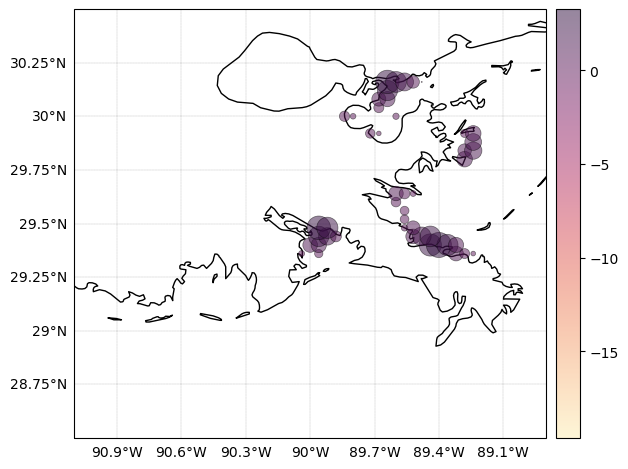

In [105]:
fig, ax = create_fig_axis()

ax.set_extent([-91.1, -88.9, 28.5, 30.5], ccrs.PlateCarree())
#lon_min, lon_max, lat_min, lat_max = -90.2, -88.64, 28.6, 30.16
#ax.set_extent([lon_min,lon_max, lat_min, lat_max], ccrs.PlateCarree())

sc = plt.scatter(lons, lats, c= np.log10(weights), edgecolors='black',s = np.log10(weights)*100, alpha= 0.5, cmap = cmocean.cm.matter,
            linewidth=0.5,  facecolors="None", transform=ccrs.PlateCarree()).set_zorder(11)

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)

fig.add_axes(ax_cb)
cbar = plt.colorbar(sc, cax = ax_cb)
#cbar.ax.set_yticklabels(['10^1', '10^2', '10^3', '10^4'])
# cbar.ax.get_yaxis().labelpad = 15
# cbar.ax.set_ylabel("Mass Flux of MP [kg/year]")
# ax_r.set_title('MP Flux Waste from Land Sources')

plt.tight_layout()
plt.show()
plt.close()

In [8]:
def compute_weighted_trajectory(df):
    df['coast_blocks'] = (df['coast'].shift() != df['coast']).cumsum()
    df_by_group = df.groupby('coast_blocks').apply(compute_trajectory_weight)
    final_df = pd.merge(df[['lat', 'lon', 'coast', 'coast_blocks']], df_by_group[['weight']], how="left", on="coast_blocks")
    return final_df

In [22]:
# t_b: time at beach, t_a: age
# weight, Ps, rs, lambda_s, lambda_b
def compute_weight(t_b, t_a, weight = 1.0, Ps = 0.38, rs = 67.0, lambda_s = 80.0, lambda_b = 24.0):
    ps_d = 1 / (1 + np.exp((rs / lambda_s)* (t_a - lambda_s)))
    f_s = (1 - Ps)*(ps_d)
    f_b = np.exp(- t_b / (lambda_b))
    return weight*(1 - f_s*f_b)

def compute_trajectory_weight(x):
    region = x['coast'].iloc[0]
    if region == 0.0:
        return pd.Series(data={'coast': region, 'time_in_coast': None, 'age': None, 'weight': None})
    time_in_region = (np.sum(x['coast_blocks']) * 3.0) / 24.0
    age = (np.max(x['coast_blocks']) * 3.0) / 24.0
    weight = compute_weight(time_in_region, age)
    return pd.Series(data={'coast': region, 'time_in_coast': time_in_region, 'age': age, 'weight': weight})

def compute_weight_by_region(x , no_group = 0.0):
    x['coast_blocks'] = (x['coast'].shift() != x['coast']).cumsum()
    dds_by_group = x.groupby('coast_blocks').apply(compute_trajectory_weight)
    # The Nan check is unnecessary when filtering by date 
    dds_by_group = dds_by_group[(dds_by_group['coast'] != no_group) & (~np.isnan(dds_by_group['coast']))]
    dds_by_group['weight_per_coast'] = dds_by_group['weight'].cumprod()
    return dds_by_group

